In [1]:
cd Desktop

/home/ficiu/Desktop


In [2]:
cd ML


/home/ficiu/Desktop/ML


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import sklearn.model_selection as skm
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from skimage import data, filters
import pandas as pd
import tensorflow as tf
from math import sqrt

In [4]:
f= open("mediaeval-2015-trainingset.txt","r")
f2=open("mediaeval-2015-testset.txt","r")

In [5]:
lines1 = [line.rstrip('\n') for line in f]
lines2 = [line2.rstrip('\n') for line2 in f2]

In [6]:
lines1

['tweetId\ttweetText\tuserId\timageId(s)\tusername\ttimestamp\tlabel',
 '263046056240115712\t¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN\t21226711\tsandyA_fake_46\tiAnnieM\tMon Oct 29 22:34:01 +0000 2012\tfake',
 '262995061304852481\t@milenagimon: Miren a Sandy en NY!  Tremenda imagen del huracán. Parece el "Día de la Independencia 2" http://t.co/41jUweux REAL! RT.\t192378571\tsandyA_fake_09\tCarlosVerareal\tMon Oct 29 19:11:23 +0000 2012\tfake',
 '262979898002534400\tBuena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy  http://t.co/PTdAXABZ\t132303095\tsandyA_fake_09\tLucasPalape\tMon Oct 29 18:11:08 +0000 2012\tfake',
 '262996108400271360\tScary shit #hurricane #NY http://t.co/e4JLBUfH\t241995902\tsandyA_fake_29\tHaaaaarryyy\tMon Oct 29 19:15:33 +0000 2012\tfake',
 '263018881839411200\tMy fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽

In [7]:
train=[]
for line in lines1:
    train.append(line.split('\t'))


test=[]
contor=0
for line in lines2:
    test.append(line.split('\t'))
    contor+=1
    print(contor)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147


In [8]:
# k=0
# lista=[]
# lista2=[]
# c1=[]
# gasit=0
# for i in range(len(c)):
#     gasit=0
#     for j in range(i,len(c),1):
#         if i not in lista and j not in lista:
#             if(c[i][1]==c[j][1]):
#                 if(i!=j):
#                     k+=1
#                     lista.append(j)
#                     gasit=1
#     if (gasit==1):
#         lista.append(i)
#     if(i%100==0):
#         print(i)


NameError: name 'c' is not defined

In [18]:
lista = [71, 24, 65, 61, 123, 88, 328, 90, 130, 99, 208, 292, 109, 153, 116, 322, 118, 6543, 139, 173, 144, 422, 150, 354, 166, 7822, 182, 7803, 198, 663, 209, 281, 221, 284, 267, 2717, 443, 1810, 1881, 522, 743, 565, 598, 580, 701, 595, 642, 606, 662, 612, 6909, 632, 4273, 646, 4270, 651, 672, 661, 2979, 680, 6916, 742, 6716, 750, 863, 777, 922, 792, 867, 1473, 1678, 799, 888, 1370, 800, 1056, 1410, 801, 1734, 821, 1165, 824, 943, 827, 939, 829, 902, 830, 1450, 831, 1059, 834, 4608, 4767, 840, 1032, 1351, 842, 850, 908, 949, 987, 1004, 1560, 1633, 1659, 1701, 845, 1166, 851, 1486, 853, 1350, 854, 1027, 858, 948, 1053, 1643, 1663, 865, 1315, 1390, 871, 7715, 872, 1356, 4579, 880, 1254, 884, 1537, 885, 1043, 890, 956, 1237, 1652, 1679, 891, 1496, 894, 1667, 897, 1604, 905, 1147, 907, 1261, 1661, 913, 1345, 928, 1276, 929, 1579, 935, 1250, 938, 1660, 940, 1284, 1519, 945, 1209, 967, 1072, 1694, 969, 1091, 973, 1574, 992, 1068, 997, 1195, 1002, 1223, 1034, 1082, 1272, 1360, 1484, 1037, 1436, 1047, 4690, 1049, 1269, 1055, 1084, 1079, 1129, 1092, 7745, 1095, 1711, 1096, 1252, 1113, 1287, 1449, 1118, 1357, 1411, 1618, 1119, 1913, 1127, 1533, 1132, 1164, 1133, 1381, 1413, 1441, 1508, 1134, 1476, 1137, 1235, 1143, 1253, 1156, 1586, 1176, 1278, 1567, 1650, 1774, 1178, 7836, 1179, 1546, 1189, 1703, 1203, 1325, 1208, 1576, 1217, 1403, 1218, 7798, 1219, 1673, 1231, 4569, 1247, 1780, 1248, 7735, 1257, 1384, 1260, 1488, 1267, 1470, 1285, 7377, 1289, 1698, 1318, 1687, 1366, 7772, 1376, 1471, 1378, 1527, 1385, 1477, 1387, 1682, 1388, 1485, 1588, 1398, 1696, 1419, 1738, 1425, 1672, 1510, 2326, 1542, 1592, 1554, 1630, 1555, 4660, 1785, 1793, 1792, 1883, 1877, 1924, 1923, 1954, 1951, 6515, 1968, 1992, 1982, 1993, 1983, 2040, 2039, 7068, 2059, 2082, 2071, 7161, 2079, 2152, 2119, 2196, 2147, 6754, 2272, 2396, 2367, 2395, 2390, 2421, 2392, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2409, 2488, 2432, 2452, 2439, 2479, 2462, 12153, 2469, 2522, 2498, 2525, 2524, 2618, 2570, 2636, 2590, 2627, 2615, 2638, 2637, 2713, 2674, 2701, 2699, 2718, 2710, 2730, 2724, 2728, 2727, 2846, 2740, 2787, 2741, 2790, 2793, 2812, 2781, 2797, 2784, 2801, 2809, 2785, 2807, 2791, 2896, 2900, 2892, 2933, 2912, 3003, 2913, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2950, 2974, 2972, 2983, 2984, 2985, 2986, 2982, 3025, 3024, 3851, 3970, 3985, 3041, 3998, 3053, 3869, 3058, 3941, 3061, 4003, 3063, 3931, 3064, 3834, 3068, 3817, 3072, 3868, 3933, 3075, 3450, 3077, 3942, 3079, 3867, 3884, 3912, 3945, 3082, 3847, 3087, 3893, 3097, 3829, 3854, 3883, 3100, 3910, 3932, 3954, 3983, 3990, 3104, 3445, 3105, 3991, 3110, 4034, 3117, 4038, 3120, 4019, 3121, 3916, 3948, 3135, 4039, 3154, 3898, 3156, 3853, 3856, 3901, 3908, 4014, 3164, 3864, 3178, 3457, 3183, 3799, 3196, 3886, 3198, 3925, 3200, 3446, 3201, 3904, 3940, 3202, 3843, 3895, 3214, 3982, 3215, 4016, 3219, 3987, 3221, 3984, 3222, 3836, 3897, 3905, 3952, 3223, 3845, 3857, 3965, 3230, 3885, 3231, 3899, 3243, 3438, 3254, 3918, 3258, 3887, 3259, 3890, 3268, 3876, 3270, 3879, 3285, 3849, 3290, 3463, 3297, 3440, 3303, 3862, 3310, 3844, 3859, 3902, 3920, 3934, 3323, 3842, 3865, 3967, 4001, 3336, 4006, 3344, 3973, 3348, 4027, 3354, 3812, 3359, 3802, 3364, 3813, 3369, 3803, 3375, 3804, 3378, 3818, 3380, 3816, 3386, 3815, 3387, 4022, 3395, 4026, 3396, 3452, 3397, 4024, 3399, 3800, 3402, 3811, 3403, 3801, 3412, 3624, 3417, 3435, 3426, 3458, 3439, 3462, 3444, 3653, 3493, 3667, 3694, 3700, 3703, 3707, 3711, 3717, 3726, 3746, 3763, 3787, 3499, 3705, 3510, 3767, 3512, 3719, 3513, 3635, 3514, 3771, 3520, 3736, 3524, 3659, 3755, 3532, 3683, 3539, 3673, 3540, 4000, 3542, 3696, 3752, 3548, 3645, 3647, 3668, 3686, 3734, 3742, 3749, 3754, 3766, 3552, 3657, 3554, 3750, 3557, 3781, 3558, 3796, 3565, 3639, 3573, 3688, 3712, 3715, 3757, 3769, 3574, 3793, 3579, 3678, 3582, 3775, 3598, 3792, 3600, 3779, 3626, 3655, 3728, 3731, 3768, 3646, 3671, 3691, 3693, 3697, 3773, 3648, 3658, 3672, 3680, 3687, 3692, 3702, 3759, 3761, 3764, 3649, 3713, 3760, 3776, 3650, 3753, 3652, 3669, 3714, 3661, 3729, 3733, 3765, 3662, 3677, 3666, 3701, 3706, 3708, 3743, 3679, 3762, 3684, 3784, 3685, 3699, 3756, 3690, 3732, 3777, 3698, 3748, 3716, 3730, 3727, 3774, 3738, 4122, 3785, 3840, 3875, 3888, 3928, 3964, 3832, 3882, 3894, 3838, 3930, 3839, 3852, 3848, 3921, 3922, 3929, 3943, 3950, 3995, 3863, 3944, 3866, 4009, 3871, 3961, 3878, 3927, 3969, 3989, 3889, 3923, 4004, 4011, 3891, 3917, 3951, 3892, 3924, 3907, 3981, 4002, 3949, 3978, 3953, 3968, 3993, 3958, 3980, 3971, 4008, 3975, 4032, 4033, 4030, 4201, 4152, 6048, 4255, 5528, 4268, 5516, 4272, 4467, 4276, 4679, 4282, 4336, 4283, 4349, 4294, 4449, 4794, 4843, 4304, 4337, 4400, 4509, 4692, 4308, 4353, 4310, 4414, 4311, 4864, 4317, 4360, 4627, 4775, 4778, 4324, 4858, 4326, 4466, 4327, 4521, 4331, 4821, 4333, 4740, 4351, 4506, 4874, 4354, 4851, 4356, 4548, 4644, 4746, 4817, 4362, 4688, 4366, 6041, 4368, 4488, 4373, 4563, 4873, 4374, 4406, 4377, 4761, 4382, 4620, 4393, 4654, 4401, 4771, 4403, 4657, 4730, 4405, 4716, 4412, 4587, 4423, 4666, 4791, 4804, 4882, 4424, 4616, 4667, 4427, 4722, 4430, 6021, 4431, 4650, 4438, 4621, 4451, 4834, 4452, 4675, 4460, 6055, 4469, 4490, 4474, 4682, 4774, 4883, 4478, 4622, 4479, 4888, 4489, 4790, 4492, 4590, 4501, 4539, 4578, 4669, 4507, 4708, 4511, 4723, 4733, 4516, 4681, 4517, 4836, 4518, 4626, 4519, 4642, 4532, 4585, 4536, 4674, 4545, 5960, 4550, 6009, 4555, 4786, 4556, 4696, 4557, 4577, 4576, 4902, 4580, 4741, 4914, 4588, 4700, 4764, 4898, 4614, 4909, 4624, 4896, 4632, 4837, 4651, 4662, 4655, 5989, 4705, 6050, 4711, 4742, 4726, 4781, 4738, 4808, 4743, 4820, 4752, 4861, 4760, 5963, 4813, 6040, 4823, 6012, 4832, 5969, 4885, 6049, 4887, 4934, 4911, 5563, 5006, 5540, 5017, 5074, 5039, 5303, 5109, 5225, 5137, 5224, 5367, 5410, 5414, 5143, 5269, 5144, 5381, 5145, 6268, 6281, 5150, 6462, 5152, 5432, 5157, 5444, 5158, 5443, 5194, 5293, 5426, 5199, 5351, 5204, 5361, 5210, 5218, 5245, 5388, 5215, 5279, 5267, 5436, 5278, 5418, 5281, 5419, 5328, 5343, 5338, 6006, 5453, 5514, 5481, 5577, 5492, 5983, 5494, 5565, 5518, 7792, 5520, 5975, 5536, 5743, 5636, 5736, 5642, 7232, 5680, 6044, 5692, 5819, 5764, 6014, 5797, 6017, 6007, 6105, 6059, 6376, 6065, 6179, 6315, 6080, 6457, 6102, 6148, 6114, 6170, 6127, 6189, 6133, 6169, 6134, 6332, 6166, 6240, 6415, 6185, 6355, 6482, 6190, 6297, 6193, 6323, 6407, 6195, 6260, 6197, 6338, 6206, 6310, 6220, 6361, 6225, 6550, 6229, 6429, 6496, 6291, 6517, 6382, 6479, 6386, 6492, 6414, 6526, 6422, 6519, 6477, 6686, 6622, 6957, 6623, 6808, 6633, 6795, 6638, 6938, 6642, 6690, 6658, 6833, 6874, 6665, 6826, 6714, 6828, 6739, 6804, 6751, 6863, 6783, 6844, 6788, 6931, 6823, 7021, 7020, 7335, 7053, 7272, 7100, 7380, 7138, 7355, 7147, 7392, 7156, 7785, 7189, 7844, 7219, 7446, 7223, 7767, 7307, 7462, 7351, 7567, 7361, 7577, 7375, 7853, 7386, 7543, 7514, 7838, 7569, 7781, 7747, 7939, 7862, 7938, 7881, 11008, 11222, 7889, 8453, 7965, 8318, 7989, 8176, 8043, 9347, 8596, 9195, 9254, 9317, 9401, 8841, 9263, 8878, 9708, 8895, 9430, 8920, 11130, 11160, 8926, 9191, 8941, 9520, 8942, 9506, 8954, 9429, 8956, 9492, 9004, 9016, 9015, 9297, 9033, 9525, 9056, 9083, 9076, 9295, 9098, 9425, 9103, 9611, 9158, 9342, 9184, 9413, 9186, 9358, 9206, 9279, 9222, 9339, 9228, 9534, 9304, 9427, 9366, 9535, 9414, 9489, 9466, 9786, 9774, 9783, 9776, 9787, 9782, 12459, 9789, 9806, 9805, 10054, 9817, 9826, 9825, 10052, 9829, 12383, 9838, 12332, 9856, 12463, 9867, 10194, 9875, 12376, 9898, 9905, 9903, 9907, 9906, 9916, 9910, 9915, 9912, 10008, 9957, 10025, 9978, 10034, 9984, 10031, 12329, 12464, 10000, 10029, 10021, 10040, 10038, 12501, 10049, 12342, 10050, 12340, 12419, 10051, 10069, 10059, 10078, 10060, 10072, 12472, 10064, 10077, 10068, 10075, 10071, 10079, 10073, 10080, 10074, 10086, 10085, 10092, 10090, 10137, 10097, 10119, 10098, 10132, 10113, 10165, 10115, 10133, 10126, 10159, 10150, 10173, 10172, 12315, 10180, 12316, 10181, 10187, 10184, 10225, 10219, 10272, 12494, 10268, 10282, 10277, 10289, 10287, 10325, 10322, 10326, 10323, 10350, 10331, 12359, 10344, 12479, 10345, 10357, 10346, 10355, 10349, 10408, 10358, 12318, 10407, 10427, 10413, 10420, 10415, 12502, 10435, 10444, 10439, 10443, 12481, 10442, 10479, 10477, 12495, 10515, 12385, 10519, 10547, 10521, 10541, 10526, 12352, 10529, 10543, 10530, 10540, 10531, 12444, 10532, 12436, 10534, 12330, 10549, 12333, 12471, 10553, 12415, 10554, 10561, 10562, 10559, 12465, 10572, 12475, 10577, 10611, 10579, 10621, 10586, 10626, 10587, 10630, 10590, 10622, 10593, 10625, 10596, 10631, 12298, 10601, 10633, 12303, 10605, 12301, 10613, 10634, 11648, 11857, 12302, 10624, 12299, 10629, 10659, 10636, 10660, 10637, 12455, 10641, 12493, 10680, 10723, 10705, 12408, 10709, 10735, 10713, 10731, 10717, 10754, 10777, 10784, 10786, 10792, 10824, 10829, 10837, 10846, 10863, 10865, 10867, 10868, 10870, 10875, 10878, 10881, 10886, 10889, 10895, 10899, 10909, 10910, 10916, 10922, 10938, 10940, 10965, 10968, 10972, 10977, 10985, 10987, 10994, 10998, 10739, 10747, 10796, 10803, 10809, 10825, 10842, 10877, 10879, 10880, 10894, 10898, 10932, 10937, 10966, 10978, 10995, 10740, 10853, 10741, 10746, 10767, 10769, 10771, 10791, 10800, 10818, 10869, 10901, 10992, 10997, 12395, 10742, 10764, 10773, 10808, 10810, 10839, 10861, 10866, 10890, 10941, 10953, 10982, 10743, 10993, 10744, 12272, 10745, 10915, 10928, 10955, 10976, 10748, 10888, 10959, 10749, 10755, 10756, 10775, 10782, 10822, 10844, 10903, 10913, 10919, 10939, 10942, 10750, 10758, 10779, 10806, 10896, 10943, 10961, 10967, 10969, 10980, 10751, 10774, 10778, 10799, 10812, 10851, 10885, 10926, 10964, 10981, 10984, 10989, 10999, 10752, 10979, 10757, 10781, 10835, 10882, 10897, 10908, 10925, 10971, 10759, 10934, 10986, 10760, 10954, 10956, 10762, 10783, 10929, 10933, 10765, 10795, 10811, 10873, 10883, 10950, 10768, 12473, 10772, 10990, 10780, 10789, 10797, 10814, 10832, 10857, 10924, 10936, 10944, 10945, 10970, 10787, 10828, 10974, 10788, 10802, 10848, 10850, 10884, 10912, 10790, 10918, 10935, 10793, 10911, 10996, 10794, 10834, 10849, 10798, 10921, 10804, 10917, 10807, 10855, 10991, 10813, 10820, 10904, 10960, 10816, 10952, 10819, 10854, 10891, 10893, 10906, 10923, 10927, 10821, 10840, 10887, 10930, 10951, 10826, 10831, 10864, 10920, 10827, 10946, 10833, 10843, 10862, 10871, 10874, 10905, 10836, 10859, 10876, 10841, 10914, 10858, 10963, 10902, 10983, 10948, 11034, 11046, 11068, 11076, 11090, 11112, 11115, 11129, 11138, 11144, 11162, 11178, 11190, 11217, 11218, 11230, 11002, 11062, 11189, 11003, 11079, 11123, 11171, 11206, 11004, 11040, 11098, 11102, 11005, 11048, 11088, 11107, 11158, 11202, 11006, 11028, 11038, 11061, 11072, 11143, 11170, 11174, 11183, 11226, 11233, 11010, 11184, 11012, 11191, 11215, 11013, 11027, 11035, 11063, 11083, 11097, 11229, 11240, 11018, 11042, 11104, 11180, 11195, 11026, 11039, 11057, 11077, 11087, 11103, 11111, 11141, 11154, 11196, 11207, 11029, 11106, 11109, 11136, 11150, 11152, 11166, 11193, 11214, 11228, 11032, 11070, 11036, 11203, 11043, 11147, 11045, 11078, 11084, 11159, 11047, 11069, 11049, 11224, 11239, 11052, 11113, 11223, 11053, 11153, 11056, 11117, 11118, 11120, 11132, 11137, 11157, 11163, 11168, 11186, 11058, 11096, 11181, 11182, 11200, 11064, 11140, 11066, 11128, 11149, 11151, 11071, 11093, 11179, 11074, 11164, 11082, 11227, 11091, 11116, 11127, 11187, 11095, 11134, 11205, 11099, 11165, 11110, 11241, 11119, 11142, 11122, 11220, 11126, 11139, 11148, 11201, 11216, 11133, 11235, 11156, 12187, 11225, 11246, 11542, 11787, 11985, 12307, 11244, 12374, 11247, 11265, 11271, 11283, 11361, 11387, 11405, 11414, 11423, 11449, 11499, 11505, 11559, 11614, 11661, 11675, 11735, 11781, 11803, 11812, 11816, 11907, 11922, 11931, 11939, 11965, 11988, 11997, 12050, 12055, 12090, 12096, 12108, 12132, 12159, 12171, 11249, 11337, 11377, 11416, 11621, 11801, 11868, 11893, 11938, 11991, 12021, 12080, 12169, 11250, 11595, 11823, 11251, 11579, 11785, 11253, 11269, 11311, 11314, 11366, 11407, 11533, 11603, 11647, 11759, 11811, 11824, 11832, 11975, 12019, 12028, 11256, 11417, 11444, 11487, 11573, 11684, 11709, 11748, 11883, 11930, 11942, 12005, 12018, 12042, 12125, 11258, 11288, 11468, 11567, 11628, 11834, 11856, 12074, 12157, 11259, 11384, 11410, 11457, 11466, 11486, 11511, 11514, 11537, 11605, 11623, 11631, 11670, 11800, 11987, 12098, 12127, 11260, 11374, 11496, 11516, 11611, 11668, 11742, 11835, 11899, 11955, 12087, 12093, 12177, 11261, 11340, 11355, 11477, 11495, 11563, 11637, 11646, 11720, 11734, 11901, 11940, 12058, 12140, 11262, 11558, 11773, 11885, 11263, 11296, 11404, 11467, 11478, 11488, 11577, 11718, 11780, 11789, 11790, 11864, 11952, 11264, 11779, 11266, 11322, 11629, 11860, 11914, 12143, 12443, 11268, 11385, 11465, 11541, 11672, 11723, 11784, 12131, 11270, 11562, 11570, 11617, 11697, 11964, 12013, 12129, 11272, 11329, 11510, 11532, 11607, 11685, 11743, 11906, 11979, 12088, 12152, 11273, 11383, 11394, 11427, 11441, 11445, 11459, 11475, 11476, 11553, 11591, 11606, 11642, 11746, 11815, 11833, 11884, 11924, 11990, 12053, 12166, 11274, 11798, 11275, 11315, 11326, 11331, 11349, 11350, 11357, 11412, 11453, 11502, 11521, 11557, 11576, 11615, 11620, 11644, 11657, 11664, 11747, 11774, 11915, 11916, 12009, 12025, 12033, 12041, 12073, 12083, 12104, 12149, 11276, 11450, 12163, 11277, 11367, 11381, 11393, 11609, 11624, 11730, 11873, 12002, 12007, 12161, 11279, 11583, 11771, 12150, 11281, 11341, 11375, 11539, 11584, 11282, 11328, 11284, 11935, 11957, 11286, 11325, 11619, 11978, 11289, 11501, 11706, 11809, 12011, 12017, 12023, 12031, 12092, 12147, 12412, 11290, 11438, 11508, 11554, 11587, 11688, 11703, 11844, 11867, 11891, 11926, 11976, 12069, 11292, 11297, 11308, 11386, 11572, 11650, 11689, 11758, 11872, 11949, 11982, 12048, 12065, 12101, 12115, 12117, 12186, 12461, 11293, 11507, 11622, 11658, 11726, 12039, 11301, 11560, 11596, 11764, 11782, 11841, 12064, 12070, 12165, 11302, 11335, 11551, 11638, 11656, 11691, 11738, 11765, 11905, 11947, 12035, 12103, 12107, 12121, 12180, 11303, 12267, 11304, 11338, 11698, 11775, 11829, 11838, 12075, 11305, 11345, 11549, 11580, 11588, 11601, 11739, 11740, 11796, 11861, 12024, 12026, 12051, 11306, 11379, 11497, 11862, 11309, 11360, 11493, 11886, 12176, 11310, 11418, 11462, 11535, 11632, 11669, 11674, 12043, 12052, 12089, 12111, 11313, 11446, 11546, 11316, 11406, 11428, 11431, 11434, 11490, 11667, 11700, 11721, 11807, 11889, 11904, 12006, 12085, 11321, 11422, 11634, 11843, 11859, 12113, 11324, 11442, 11870, 11327, 11485, 11534, 11713, 11969, 11330, 11456, 11666, 11681, 11750, 11986, 12076, 11333, 11732, 11339, 11364, 11343, 11353, 11500, 11569, 11641, 11687, 11845, 11927, 11966, 11994, 12030, 12036, 12102, 12136, 11344, 11401, 11415, 11436, 11443, 11481, 11484, 11530, 11586, 11600, 11610, 11640, 11643, 11663, 11707, 11749, 11754, 11810, 11819, 11866, 11871, 11874, 11881, 11971, 11995, 12044, 12059, 12081, 12123, 12139, 12144, 12145, 12154, 12168, 12462, 11347, 11419, 11470, 11506, 11522, 11526, 11536, 11543, 11897, 11913, 11917, 11920, 12078, 12086, 12175, 11354, 11392, 11491, 11727, 11356, 11391, 11403, 11494, 11498, 11518, 11550, 11633, 11636, 11654, 11699, 11762, 11895, 11911, 11993, 12014, 12038, 12049, 12063, 12114, 12126, 12179, 12181, 11358, 11396, 11565, 11604, 11828, 11925, 11974, 12184, 11359, 11799, 11362, 11389, 11471, 11492, 11529, 11728, 11752, 11777, 11846, 11959, 11970, 11373, 11724, 11376, 11592, 11756, 12027, 11380, 11424, 11527, 11568, 11578, 11701, 11767, 11918, 12054, 12068, 11382, 11892, 11388, 11598, 11769, 11912, 11390, 11538, 11655, 11943, 12183, 11398, 11900, 11400, 12015, 11402, 11435, 11454, 11473, 11652, 11929, 11941, 11408, 12141, 11409, 11460, 11411, 11421, 11469, 11472, 11503, 11525, 11626, 11665, 11825, 11954, 11967, 12146, 11413, 11564, 11425, 12029, 11432, 11741, 11437, 11582, 11439, 11452, 11772, 11932, 12004, 12032, 12118, 11440, 11682, 11763, 11447, 11909, 12047, 11448, 11678, 11696, 11725, 11973, 11998, 12173, 11458, 11715, 12056, 11483, 11593, 12137, 12155, 11504, 11751, 11960, 12110, 11512, 11847, 11519, 11778, 11520, 12003, 12010, 11528, 11608, 11958, 11531, 11850, 11855, 12119, 11544, 11770, 11545, 11766, 11548, 11820, 11992, 11996, 11555, 11625, 11928, 11953, 12008, 12012, 12082, 12158, 11561, 12062, 11566, 11693, 11574, 11745, 11590, 12164, 11594, 11903, 11599, 11676, 11686, 11831, 11946, 11972, 12057, 12060, 12185, 11602, 11683, 11716, 11908, 11980, 11612, 11627, 11635, 11639, 11645, 11653, 11671, 11677, 11695, 11702, 11731, 11733, 11757, 11760, 11783, 11788, 11797, 11802, 11805, 11814, 11817, 11821, 11830, 11836, 11851, 11853, 11858, 11877, 11880, 11882, 11890, 11896, 11921, 11933, 11951, 11962, 11981, 11984, 12061, 12079, 12122, 12470, 11616, 11879, 11618, 11910, 11630, 11849, 11649, 11842, 12072, 11651, 11989, 11673, 11956, 11679, 12022, 11704, 11793, 12091, 11705, 11898, 12067, 11708, 11919, 11963, 12170, 11710, 11804, 11729, 11887, 11744, 11936, 12160, 11755, 12128, 12133, 11806, 11869, 12097, 12151, 11808, 11999, 11837, 12045, 11854, 12037, 12077, 11934, 11961, 11950, 12138, 12116, 12442, 12244, 12456, 12275, 12445, 12336, 12416, 12362, 12409, 12370, 12405, 12371, 12421, 12397, 12434, 12433, 12511, 12509, 12516, 12518, 12515, 12668, 12667, 12777, 12755, 12844, 12855, 12944, 12767, 12881, 12919, 12785, 12977, 12788, 12984, 12793, 12816, 12794, 12916, 12795, 12899, 12797, 12826, 12968, 12798, 12905, 12802, 12908, 12815, 12926, 12928, 12824, 12891, 12924, 12829, 12848, 12847, 12883, 12851, 12922, 12873, 12955, 12923, 13025, 13050, 13002, 13108, 13106, 13114, 13109, 13206, 13232, 13196, 13322, 13274, 13337, 13275, 13324, 13341, 13355, 13285, 13308, 13304, 13352, 13310, 13361, 13327, 13394, 13391, 13532, 13438, 13496, 13444, 13455, 13454, 13544, 13491, 13528, 13519, 13961, 13962, 13963, 13964, 13965, 13966, 13967, 13968, 13969, 13970, 13971, 13972, 13973, 13974, 13975, 13976, 13977, 13978, 13979, 13980, 13981, 13982, 13983, 13984, 13985, 13986, 13987, 13988, 13989, 13990, 13991, 13960, 13994, 13997, 13993, 13996, 13995, 14109, 14026, 14086, 14030, 14082, 14042, 14067, 14054, 14103, 14068, 14220, 14081, 14095, 14087, 14146, 14132, 14144, 14138, 14184, 14169, 14174, 14172, 14196, 14189, 14211, 14207, 14216, 14208, 14214, 14213, 14229, 14228, 14247, 14241, 14268, 14267, 14300, 14279, 14283, 14281, 14286, 14295, 14298, 14284, 14293, 14301, 14292, 14384, 14319, 14336, 14329, 14372, 14347, 14449, 14452, 14445]
f = open("demofile1.txt", "w")
f.write(str(lista)) 


18351

# Separam retweeturile

In [20]:
#GASIM DUBLURILE SI SCOATEM FALSURILE
from dateutil.parser import parse
minim=0
list2=[]
i=0
mini=0
while i<len(lista):
    cur=i
    minim=parse(train[lista[cur]][5])
    label = train[lista[cur]][6]
    while i<len(lista) and train[lista[cur]][1]==train[lista[i]][1]:
        counteraux+=1
        if train[lista[i]][6] == "real" and cur!=i:
            counter+=1
        if minim>parse(train[lista[i]][5]):
            minim = parse(train[lista[i]][5])
            mini=i
        i+=1

    if len(list2) ==0:
            list2.append(mini)
    if len(list2)!=0 and list2[-1]!=mini:    
                list2.append(mini)
    
        
len(list2)

560

In [21]:
train[2469],train[12153]

(['264736470089216000',
  "Lower Manhattan's power is gone. Pretty eerie scene. #Sandy http://t.co/XsFx34gQ",
  '2675041',
  'sandyB_fake_11',
  'cDima',
  'Sat Nov 03 14:31:07 +0000 2012',
  'fake'],
 ['264736470089216000',
  "Lower Manhattan's power is gone. Pretty eerie scene. #Sandy http://t.co/XsFx34gQ",
  '2675041',
  'sandyB_real_54',
  'cDima',
  'Sat Nov 03 14:31:07 +0000 2012',
  'real'])

In [22]:
#number of retweets to be removed
lista3=[]
for i in range(len(lista2)):
    lista3.append(lista[lista2[i]])

In [23]:
j=0
listaFinal=[]
for i in range(len(train)):
    if i in lista:
        j+=1
        if i in lista3:
            listaFinal.append(i)
    else:
            listaFinal.append(i)

# Final after removing retweets and keeping the first retweet ordered by the timestamp so it does not have bias (so we have a higher chance of having a useful username)

In [24]:
k=train.copy()
del k[2469]
del k[12153]

In [25]:
len(k),len(train)

(14482, 14484)

In [26]:
almostfinal=[]
for tweet in range(len(k)):
    if tweet in listaFinal:
        almostfinal.append(k[tweet])

In [27]:
#check if humor == true post
for i in range(len(almostfinal)):
    if(almostfinal[i][6]=='humor'):
         if(almostfinal[i][3].find('real')!=-1):
                print(almostfinal[i][3])

In [28]:
for i in range(len(almostfinal)):
    if(almostfinal[i][6]=='humor'):
        almostfinal[i][6]='fake'

In [29]:
list1 = [1 ,4]
list12 = [6]
TrainX = [[l[i] for i in list1] for l in almostfinal]
TrainY =  [l[6] for l in almostfinal]
TestX = [[l[i] for i in list1] for l in test]
TestY =[l[6] for l in test]

In [30]:
for i in range(len(TrainY)):
    if(TrainY[i]=='real'):
        TrainY[i]=1
    else:
        TrainY[i]=0

for i in range(len(TestY)):
    if(TestY[i]=='real'):
        TestY[i]=1
    else:
        TestY[i]=0

In [31]:
import re
text = re.sub(r'http://t.co/\S+', '', TrainX[2][0])

In [32]:
for i in range(len(TrainX)):
    text = re.sub(r'http://t.co/\S+', '', TrainX[i][0])
    TrainX[i][0]=text

for i in range(len(TestX)):
    text = re.sub(r'http://t.co/\S+', '', TestX[i][0])
    TestX[i][0]=text

Scos ce nu era important

In [33]:
len(re.findall(r'#\S+', TrainX[3][0]))

2

In [34]:
nr_hasthags1=[]
for i in range(len(TrainX)):
    nr_hasthags1.append(len(re.findall(r'#\S+', TrainX[i][0])))

nr_hasthags2=[]
for i in range(len(TestX)):
    nr_hasthags2.append(len(re.findall(r'#\S+', TestX[i][0])))

In [35]:
for i in range(len(TrainX)):
    TrainX[i].append(nr_hasthags1[i])

for i in range(len(TestX)):
    TestX[i].append(nr_hasthags2[i])

In [36]:
nr_emoticons=[]
for i in range(len(TrainX)):
    nr_emoticons.append(len(re.findall(r'[\U0001f100-\U0009f99999]',TrainX[i][0])))
for i in range(len(TrainX)):
    TrainX[i].append(nr_emoticons[i])

nr_emoticons=[]
for i in range(len(TestX)):
    nr_emoticons.append(len(re.findall(r'[\U0001f100-\U0009f99999]',TestX[i][0])))
for i in range(len(TestX)):
    TestX[i].append(nr_emoticons[i])

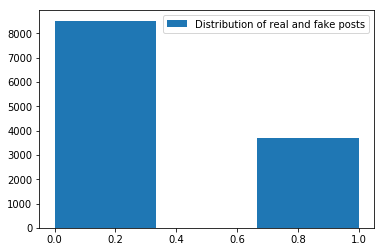

In [37]:
plt.hist([l for l in TrainY],3,label='Distribution of real and fake posts')
plt.legend()
plt.show()

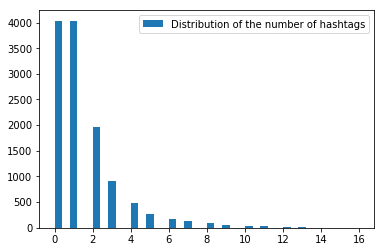

In [38]:
#number of hashtags
plt.hist([l[2] for l in TrainX],40,label='Distribution of the number of hashtags')
plt.legend()
plt.show()

In [39]:
#Lungime tweet maxima 140-280 noua
tf.set_random_seed(1234)
tf.reset_default_graph()


In [40]:
x_train1 = [l[0] for l in TrainX[1:]]
x_test1 = [l[0] for l in TestX[1:]]
y_train1 = TrainY[1:]
y_test1 = TestY[1:]
vocabulartotal1=x_train1+x_test1

In [41]:
vocab_processor = tf.contrib.learn.preprocessing.VocabularyProcessor(25)
# Train the vocab_processor from the training set
vocabulartotal1 = vocab_processor.fit_transform(vocabulartotal1)
x_train1=vocab_processor.transform(x_train1)
x_test1=vocab_processor.transform(x_test1) 

# We need these to be np.arrays instead of generators
x_train1 = np.array(list(x_train1))
y_train1 = np.array(y_train1).astype(int)

x_test1 = np.array(list(x_test1))
y_test1 = np.array(y_test1).astype(int)

n_words = len(vocab_processor.vocabulary_)
print('Total words: %d' % n_words)

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Total words: 20587


In [42]:
a=[]
b=[]
x_trainuser = [val for sublist in [list(l[1]) for l in TrainX[1:]] for val in sublist]
x_testuser = [val for sublist in  [list(l[1]) for l in TestX[1:]] for val in sublist]
y_trainuser = TrainY[1:]
y_testuser = TestY[1:]
vocabularuser=x_trainuser+x_testuser

vocab_processoruser = tf.contrib.learn.preprocessing.VocabularyProcessor(1)
# Train the vocab_processor from the training set
vocabularuser = vocab_processoruser.fit_transform(vocabularuser)

for user in [list(l[1]) for l in TrainX[1:]]:
    a.append(np.array(list(vocab_processoruser.transform(user))))

for user in [list(l[1]) for l in TestX[1:]]:
    b.append(np.array(list(vocab_processoruser.transform(user))))

n_words = len(vocab_processoruser.vocabulary_)
print('Total words: %d' % n_words)

Total words: 64


In [43]:
A=np.zeros(len(x_train1)*(40+10)).reshape(len(x_train1),40+10)
A.shape
B=np.zeros(len(x_test1)*(40+10)).reshape(len(x_test1),40+10)
B.shape

(3781, 50)

In [44]:
for i in range(len(x_train1)):
    listanoua=[]
    for each in range(len(a[i])):
        listanoua.append(int(a[i][each]))
    listanoua.append(int(TrainX[1:][i][2]))
    listanoua.append(int(TrainX[1:][i][3]))
    A[i,:len(np.append(x_train1[i],np.array(listanoua)))]=np.append(x_train1[i],np.array(listanoua))

In [45]:
for i in range(len(x_test1)):
    listanoua=[]
    for each in range(len(b[i])):
        listanoua.append(int(b[i][each]))
    listanoua.append(int(TestX[1:][i][2]))
    listanoua.append(int(TestX[1:][i][3]))
    B[i,:len(np.append(x_test1[i],np.array(listanoua)))]=np.append(x_test1[i],np.array(listanoua))

In [47]:
A[1]

array([21., 22., 12., 20., 23., 24., 25., 26., 27., 19., 28., 18., 29.,
        3.,  4., 30., 31., 32., 33.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        7.,  8.,  9., 10., 11., 12.,  4.,  8.,  7.,  8.,  4.,  7.,  9.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [53]:
#Choosing the best number of estimators
f1max=0
n_estimatorsmax=0
contor=0
average=[]
average1=[]
for i in range (1,100):
    sum1=0
    sum2=0
    for j in range(10):
        rnd_clf=RandomForestClassifier(n_estimators=54,max_depth=i,n_jobs=-1) #n estimators found em
        rnd_clf.fit(A,y_train1)
        b = rnd_clf.predict(A)
        c = rnd_clf.predict(B)
        train=f1_score(y_train1,b,average='micro')
        test =f1_score(y_test1,c,average='micro')
        sum1+=test
        sum2+=train
    if(sum1/10>f1max):
            f1max=sum1/10
            n_estimatorsmax=i
            rnd_clf1= rnd_clf
    average.append(sum1/10)
    average1.append(sum2/10)
    contor+=1
    print(i)

0


In [54]:
f1max

0.6760380851626553

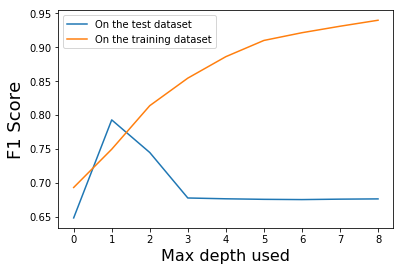

In [50]:
plt.ylabel('F1 Score', fontsize=18)
plt.xlabel('Max depth used', fontsize=16)
plt.plot(average, label='On the test dataset')
plt.plot(average1, label='On the training dataset')
plt.legend()
plt.show()

In [51]:
#NU MERGE

decision_tree=DecisionTreeClassifier(max_depth=14)
decision_tree.fit(x_train,y_train)
a1=decision_tree.predict(x_test)
b1=decision_tree.predict(x_train)
test1=f1_score(y_test,a1,average='micro')
train1=f1_score(y_train,b1,average='micro')
print(test1,train1)

NameError: name 'x_train' is not defined